In [2]:
using DifferentialEquations,Plots

## Model rozprzestrzeniania się epidemii

$$\frac{dS}{dt}=−\beta SI$$
$$\frac{dI}{dt}=\beta SI−\gamma I$$
$$\frac{dR}{dt}=\gamma I$$

Warunki początkowe: <br>
$\beta = \frac{1}{2} >0$ - tempo rozprzestrzeniania się infekcji <br>
$\gamma = \frac{1}{3} >0$ - współczynnik zdrowienia osobników zainfekowanych <br>
$S(0) = 1 > 0$ - osobniki podatne <br>
$I(0) = 1.27 * 10^{-6} >0$ - osobniki chorujące i roznoszące infekcję <br>
$R(0)=0$ - osobniki ozdrowiałe <br>

Korzystamy z metody Eulera rozpisując układ równań do postaci rekurencyjnej:

$$S_{n+1} = S_n - \Delta t \beta S_n I_n$$

$$I_{n+1} = I_n + \Delta{t}(\beta S_n I_n - \gamma I_n)$$

$$R_{n+1} = R_n + \Delta t\gamma I_n$$

Jako $\Delta t$ przyjmujemy okres jednego dnia. Zasymulujemy epidemię w ciągu 100 dni.

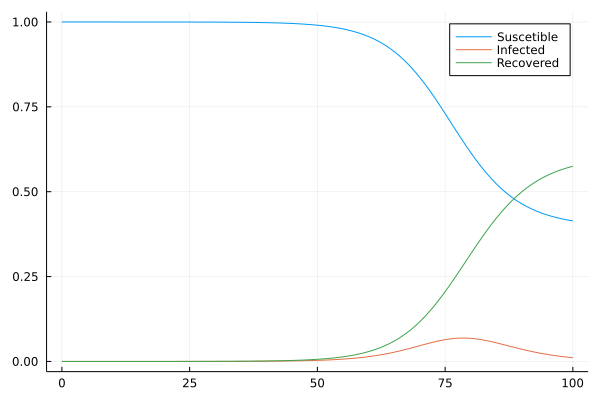

In [3]:
beta = 0.5
gamma = 0.33
deltaT = 1
u0 = [1,1.27*10^(-6),0]
if mod(100,deltaT) == 0
    finish = div(100,deltaT)
else
    finish = div(100,deltaT) + 1
end
function myEuler(deltaT,u0,finish)
    S = []
    push!(S,u0[1])
    I = []
    push!(I,u0[2])
    R = []
    push!(R,u0[3])
    for i in 1:finish
        prev_S = last(S)
        prev_I = last(I)
        prev_R = last(R)
        push!(S,prev_S - beta*deltaT*prev_S*prev_I)
        push!(I,prev_I + deltaT*beta*prev_S*prev_I - deltaT*gamma*prev_I)
        push!(R,prev_R + deltaT*gamma*prev_I)
    end
    return S,I,R
end
solution = myEuler(deltaT,u0,finish)
plot(
    0:deltaT:finish*deltaT,
    [solution[1],solution[2],solution[3]], 
    label=["Suscetible" "Infected" "Recovered"])

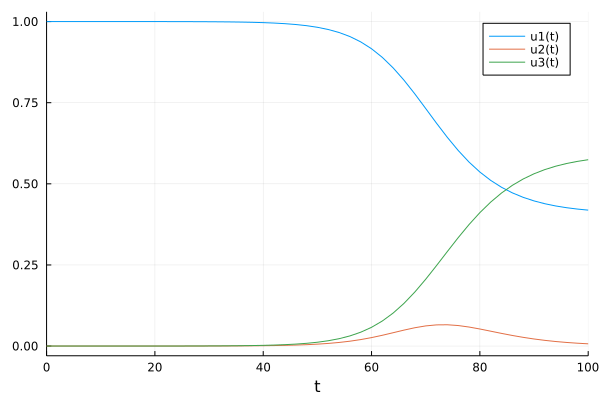

In [4]:
function kingKunta(du,u,p,t)
    S,I,R = u
    β,γ = p 
    du[1] = dS = - β*S*I
    du[2] = dI = β*S*I - γ*I
    du[3] = dR = γ*I
end
u0 = [1,1.27*10^(-6),0]
tspan = (0,100)
p = [0.5, 0.33]
prob = ODEProblem(kingKunta,u0,tspan,p)
sol = solve(prob,saveat=2)
plot(sol)

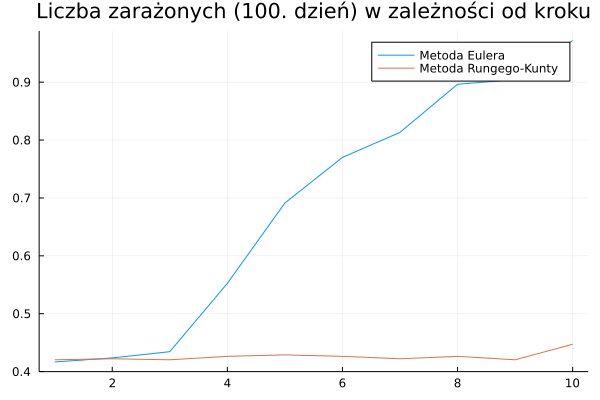

In [5]:
eulers = []
kuntas = []
for i in 1:10
    if mod(100,i) == 0
        finish = div(100,i)
    else
        finish = div(100,i) + 1
    end
    tspan = (0,finish*i)
    prob = ODEProblem(kingKunta,u0,tspan,p)
    sol = solve(prob,saveat=i)
    solution = myEuler(i,u0,finish)
    push!(kuntas,sol[finish][1])
    push!(eulers,solution[1][finish])
end
plot(1:10, 
    [eulers,kuntas], 
    label=["Metoda Eulera" "Metoda Rungego-Kunty"],
    title="Liczba zarażonych (100. dzień) w zależności od kroku")

## Automat komórkowy

In [1]:
using Plots, StatsBase

┌ Info: Saved animation to 
│   fn = /home/michal/Mownit/tmp.gif
└ @ Plots /home/michal/.julia/packages/Plots/NQpB8/src/animation.jl:114


Plots.AnimatedGif("/home/michal/Mownit/tmp.gif")
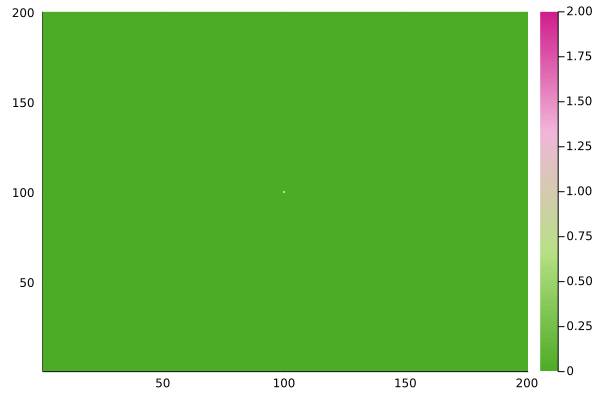

In [3]:
beta = 0.25
gamma = 0.1
x = 200
y = 200
t = 100
state = zeros(Int8,x,y,t)
state[100, 100,1] = 1
for time in 1:t-1
    for j in 2:y-1
        for i in 2:x-1
            state[i,j,time+1] = state[i,j,time]
            
            if state[i,j,time] == 0
                for a in -1:1
                    for b in -1:1
                        if state[i+a,j+b,time] == 1 && state[i,j,time+1] == 0
                            state[i,j,time+1] = sample([0,1],Weights([1-beta,beta])) 
                        end
                    end
                end
            end
            
            if state[i,j,time] == 1
                state[i,j,time+1] = sample([1,2],Weights([1-gamma,gamma]))
            end
        end
    end
end

@gif for time ∈ 1:t
    heatmap(state[:,:,time], clims=(0, 2), color=cgrad(:PiYG_4, rev=true))
end